# Практическая работа №3: Статистический анализ социальных сетей.
Выполнила студентка гр. 0381 Березовская Валерия. Вариант №2

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и (возможную) связь между ними
$$D_{ij}=(X_{ij}, X_{ji}), i \neq j$$

Виды диад:
- **Взаимная диада**: $D_{ij}=(1, 1)$
- **Асимметричная диада**: $D_{ij}=(1, 0), D_{ij}=(0, 1)$
- **Нулевая диада**: $D_{ij}=(0, 0)$

**Цензус диад** - тройка чисел <M, A, N>, где:

- $M=\sum_{i<g}X_{ij}X_{ji}$ - количество взаимных диад

- $A=X_{++}-2M$ - количество асимметричных диад

- $N=\binom{g}{2} - A - M$ - количество нулевых диад

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе:
$$-\inf<p_{KP}\leq1$$
Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом.

**Фиксированный выбор**:
- Предполагается, что каждый актор делает d выборов из (g-1) акторов, доступных для выбора
- Оценка $\rho_{KP}$ по методу моментов:
$$\hat{\rho_{KP}} = \frac {2(g-1)M-gd^{2}}{gd(g-1-d)}$$

**Свободный выбор**:
- i-й актор выбирает $d_O(n_i)=x_{i+}$ акторов
- Пусть $L=\sum x_{i+}, L_2=\sum x_{i+}^2$
- Оценка $\rho_{KP}$ по методу моментов:
$$\hat{\rho_{KP}} = \frac {2(g-1)^2M-L^2+L_2}{L(g-1)^2-L^2+L_2}$$


**Индекс взаимности Бандиопадхьяйя**


*   Данный индекс основан на минимальном и максимальном значениях количества взаимных диад
*   Значение индекса:

  $p_{B}=\frac{M-M^{min}}{M^{max}-M^{min}}$

  Функция$\: f(t):$

  $f(t)=\sum_{i=1}^{t}x_{i+}-t(g-1)-\binom{t}{2}$

  Функция$\: g(t):$

  $g(t)=\sum_{i=1}^{t}x_{i+}-t(t-1)-\sum_{i=t+1}^{g}min(t,x_{i+})$


**Статистический анализ количества дуг**

  *   Число дуг: $\: L\sim B(g,(g-1),1/2) $
  *   Вероятность того, что число дуг в орграфе равно $L$:
   $\:P(L=I)=\Large \binom{g(g-1)}{I}$$2^{g(1-g)}$
  *   Математическое ожидание: $\: E(L)=\Large \binom{g}{2} $
  *   Дисперсия: $\: D(L)=\Large 1/2\binom{g}{2} $

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
install.packages("devtools")
install.packages('network')
install.packages('sna')
install.packages('igraph')
install.packages('incidentally')
install.packages('HyperG')

In [ ]:
devtools::install_github("DougLuke/UserNetR")

In [ ]:
library(network)
library(igraph)
library(sna)
library(HyperG)

1. Смоделирован случайный орграф $\mathscr{G}_{d}$ на основе модели Эрдеша—Реньи: $\mathscr{G}_{d}=\mathscr{G}(g, p)$, где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами.

Вариант 2: g=100, p=0.64

In [41]:
g <- 100
p <- 0.64
P <-0.54
alpha <- 0.03
R <- sample_gnp(g, p, directed=TRUE)
G <-erdos.renyi.game(g, p, type= "gnp",  directed = TRUE)
A <- as_adjacency_matrix(G, sparse=FALSE)

Модель Эрдёша — Реньи — это модель генерации случайных графов, в которой граф строится путем добавления очередного ребра с вероятностью p. Все ребра добавляются независимо друг от друга. В данной модели все графы с n узлами и M ребрами имеют одинаковую вероятность $p^{M}(1-p)^{\binom{1}{2}-M}$

2. Полученный граф отображен.

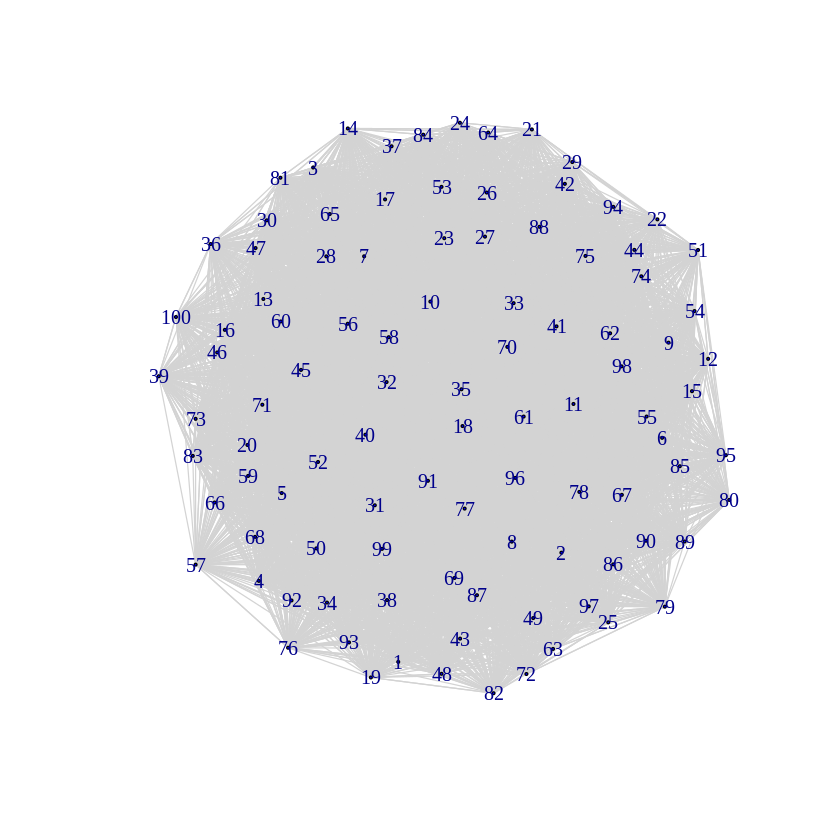

In [42]:
plot(G, edge.arrow.size=0.02, edge.color = "#D3D3D3", vertex.size = 1, vertex.color = "blue", layout = layout.kamada.kawai(G))

3. Вычислена пятичисловая сводка для графа.

In [43]:
net <- as.network(as.matrix(G, "edgelist"), directed=TRUE)

print(paste('Размер сети:', network.size(net)))
print(paste('Плотность сети:', gden(net, mode="graph")))
print(paste('Компоненты сети:', components(net)))

geoDistances <- geodist(net)
print(paste('Диаметр: ', max(geoDistances$gdist)))

print(paste('Коэффициент кластеризации: ', gtrans(net, mode = "graph")))

[1] "Размер сети: 100"
[1] "Плотность сети: 0.640606060606061"
[1] "Компоненты сети: 1"
[1] "Диаметр:  2"
[1] "Коэффициент кластеризации:  0.640701364686017"


4. Вычислен цензус диад.

In [44]:
census <- dyad_census(G)
print(paste('M:', census$mut))
print(paste('A:', census$asym))
print(paste('N:', census$null))

[1] "M: 2030"
[1] "A: 2282"
[1] "N: 638"


Из цензуса диад можно сделать вывод, что в графе большинство пар имеют между собой одностроннюю связь и относительно мало пар акторов, между которыми отсутствует связь.

5. Вычислена оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе.

In [45]:
KPFixed <- function(d, G) {
    M <- dyad_census(G)$mut
    g <- gsize(G)
    result <- (2*(g-1)*M - g*d*d)/(g*d*(g-1-d))
    return (result)
}

KPFree <- function(G) {
    M <- dyad_census(G)$mut
    L <- sum(igraph::degree(G, mode="in"))
    L_2 <- sum(igraph::degree(G, mode="in")^2)
    g <- gsize(G)
    result <- (2*(g-1)^2*M-L^2+L_2)/(L*(g-1)^2-L^2+L_2)
    return (result)
}

d <- 5
print(KPFixed(d, G))
print(KPFree(G))

[1] 0.1273472
[1] 0.6401204


6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [46]:
Pr_fix <- d/(g - 1) * (d/(g - 1) + KPFixed(d, G) * (g - 1 - d)/(g - 1))
Pr_fix

Pr_free <- d/(g - 1) * (d/(g - 1) + KPFree(G) * (g - 1 - d)/(g - 1))
Pr_free

[1] 0.008657606

[1] 0.03324728

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [37]:
reciprocity(G)
grecip(net, measure = "edgewise")

[1] 0.6362484

Mut 
0.646846

Из всех возможных взаимных диад в графе присутствует примерно 65%.

8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе
G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при
уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается

In [47]:
n <- g*(g - 1)
binom.test(sum(A), n, conf.level = 0.97)


	Exact binomial test

data:  sum(A) and n
number of successes = 6342, number of trials = 9900, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
97 percent confidence interval:
 0.6300423 0.6510705
sample estimates:
probability of success 
             0.6406061 


Нулевая гипотеза отвергается. Максимальный уровень значимости при котором нулевая гипотеза не отвергается должен быть меньше, чем 2.2e-16

9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑
имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.

In [48]:
binom.test(sum(A), n, P, conf.level = 0.97)


	Exact binomial test

data:  sum(A) and n
number of successes = 6342, number of trials = 9900, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.54
97 percent confidence interval:
 0.6300423 0.6510705
sample estimates:
probability of success 
             0.6406061 


Аналогично предыдущему пункту.Нулевая гипотеза отвергается. Максимальный уровень значимости при котором нулевая гипотеза не отвергается должен быть меньше, чем 2.2e-16.

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [29]:
ConfLow <-  sum(A)/(g*(g-1)) - alpha * sqrt( sum(A)/(g*(g-1)) * (1 - sum(A)/(g*(g-1)))/(g*(g-1)))
ConfUp <-  sum(A)/(g*(g-1)) + alpha * sqrt( sum(A)/(g*(g-1)) * (1 - sum(A)/(g*(g-1)))/(g*(g-1)))
cat('С вероятностью 97% интервал от ', ConfLow, ' до ', ConfUp, ' полностью покрывает истинное значение параметра p')

С вероятностью 97% интервал от  0.6374308  до  0.6377207  полностью покрывает истинное значение параметра p

Построен доверительный интервал для уровня доверия 0.97. 

## Выводы

Общий вывод по проделанной работе.